In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
folderpath = os.getcwd()
folderpath

'C:\\ShaileshData\\Sales Analysis'

In [3]:
# using traditional methods:
for file in os.listdir(folderpath):
    if file.endswith('.csv'):
        print(os.path.join(folderpath,file))

C:\ShaileshData\Sales Analysis\Sales_April_2019.csv
C:\ShaileshData\Sales Analysis\Sales_August_2019.csv
C:\ShaileshData\Sales Analysis\Sales_December_2019.csv
C:\ShaileshData\Sales Analysis\Sales_February_2019.csv
C:\ShaileshData\Sales Analysis\Sales_January_2019.csv
C:\ShaileshData\Sales Analysis\Sales_July_2019.csv
C:\ShaileshData\Sales Analysis\Sales_June_2019.csv
C:\ShaileshData\Sales Analysis\Sales_March_2019.csv
C:\ShaileshData\Sales Analysis\Sales_May_2019.csv
C:\ShaileshData\Sales Analysis\Sales_November_2019.csv
C:\ShaileshData\Sales Analysis\Sales_October_2019.csv
C:\ShaileshData\Sales Analysis\Sales_September_2019.csv
C:\ShaileshData\Sales Analysis\yearly_data.csv


In [4]:
# using list comprehension:
files = [os.path.join(folderpath,file) for file in os.listdir(folderpath) if file.endswith('csv')]
files

['C:\\ShaileshData\\Sales Analysis\\Sales_April_2019.csv',
 'C:\\ShaileshData\\Sales Analysis\\Sales_August_2019.csv',
 'C:\\ShaileshData\\Sales Analysis\\Sales_December_2019.csv',
 'C:\\ShaileshData\\Sales Analysis\\Sales_February_2019.csv',
 'C:\\ShaileshData\\Sales Analysis\\Sales_January_2019.csv',
 'C:\\ShaileshData\\Sales Analysis\\Sales_July_2019.csv',
 'C:\\ShaileshData\\Sales Analysis\\Sales_June_2019.csv',
 'C:\\ShaileshData\\Sales Analysis\\Sales_March_2019.csv',
 'C:\\ShaileshData\\Sales Analysis\\Sales_May_2019.csv',
 'C:\\ShaileshData\\Sales Analysis\\Sales_November_2019.csv',
 'C:\\ShaileshData\\Sales Analysis\\Sales_October_2019.csv',
 'C:\\ShaileshData\\Sales Analysis\\Sales_September_2019.csv',
 'C:\\ShaileshData\\Sales Analysis\\yearly_data.csv']

#### Merging all files in single files

In [5]:
yearly_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(file)
    yearly_data = pd.concat([yearly_data, df])

yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",NaN
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",NaN
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",NaN


In [6]:
yearly_data.shape

(373700, 7)

In [7]:
# Check for null values:
yearly_data.isnull().sum()

Order ID              1090
Product               1090
Quantity Ordered      1090
Price Each            1090
Order Date            1090
Purchase Address      1090
Unnamed: 0          186850
dtype: int64

In [8]:
# drop null values from 'Order ID' column:
yearly_data.dropna(subset=['Order ID'], inplace=True)
yearly_data.drop_duplicates(inplace=True)

In [9]:
yearly_data.isnull().sum()

Order ID                 0
Product                  0
Quantity Ordered         0
Price Each               0
Order Date               0
Purchase Address         0
Unnamed: 0          185687
dtype: int64

In [10]:
yearly_data.shape

(371991, 7)

In [11]:
yearly_data=yearly_data[~(yearly_data['Product'] == 'Product')]

In [12]:
yearly_data.drop(columns ='Unnamed: 0', inplace=True)

In [13]:
cols = yearly_data.columns
cols

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [14]:
yearly_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Adding Month to dataframe

In [15]:
yearly_data['Month'] = yearly_data['Order Date'].str[0:2].astype('int32')
np.unique(yearly_data.Month)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### Add city to dataframe

In [16]:
yearly_data['City'] = yearly_data['Purchase Address'].apply(lambda x : x.split(",")[1].strip() 
                                                            + " " 
                                                            + x.split(",")[2].split()[0].strip())
yearly_data.drop(columns=['Purchase Address'],inplace = True)
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,Boston MA
3,176560,Google Phone,1,600,04/12/19 14:38,4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,Los Angeles CA


#### 1. What was the best month of sale?

In [17]:
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,Boston MA
3,176560,Google Phone,1,600,04/12/19 14:38,4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,Los Angeles CA


In [18]:
yearly_data['Quantity Ordered']=pd.to_numeric(yearly_data['Quantity Ordered'])
yearly_data['Price Each']=pd.to_numeric(yearly_data['Price Each'])
yearly_data['Sales']=yearly_data['Quantity Ordered']*yearly_data['Price Each']

In [19]:
results = yearly_data.groupby("Month").sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,21796,3622693.19,3643669.89
2,26880,4375825.10,4402100.50
3,33984,5580292.47,5612073.73
4,41094,6733889.78,6779888.22
5,37320,6268259.74,6303222.98
6,30487,5122529.11,5154082.41
7,32126,5263764.68,5294237.08
8,26877,4457309.32,4485551.25
9,26200,4166889.74,4192025.82


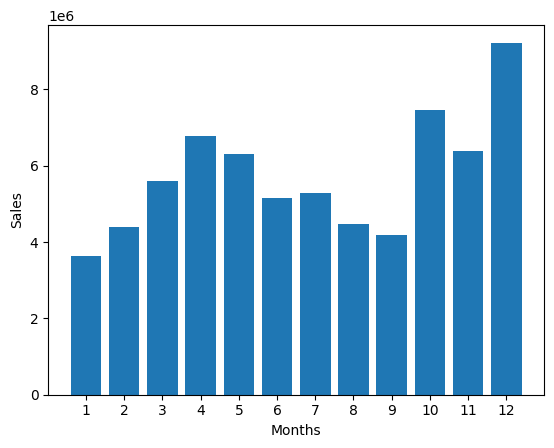

In [20]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(months)
plt.show()

### 2. Which city has highest number of sales?

In [21]:
results = yearly_data.groupby('City').sum()
results.reset_index(inplace=True)
results

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta GA,33186,5558516.89,209443,5589697.65
1,Austin TX,22290,3618213.64,139549,3637626.08
2,Boston MA,45022,7271808.17,282010,7320269.66
3,Dallas TX,33437,5502654.20,209067,5533349.36
4,Los Angeles CA,66536,10838606.93,416345,10900875.08
5,New York City NY,55835,9268291.37,351298,9326184.57
6,Portland ME,5496,893941.61,34263,899079.65
7,Portland OR,22594,3720394.66,141138,3740742.90
8,San Francisco CA,100408,16415463.12,630469,16516947.46
9,Seattle WA,33087,5463882.56,209758,5492801.50


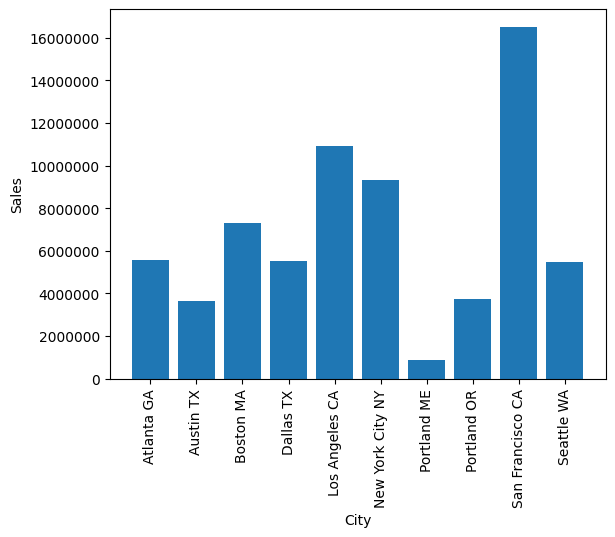

In [22]:
cities = results['City'].unique()

plt.bar(cities, results['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(cities, rotation='vertical')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


plt.show()

## 3.What time we should display advertisement to get max audience?

In [23]:
yearly_data['Order Date'] = pd.to_datetime(yearly_data['Order Date'])
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,Dallas TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,Boston MA,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,Los Angeles CA,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,Los Angeles CA,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,Los Angeles CA,11.99


In [24]:
yearly_data['Hour']=yearly_data['Order Date'].dt.hour
yearly_data['Minutes']=yearly_data['Order Date'].dt.minute
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,Sales,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,Dallas TX,23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,Boston MA,99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,Los Angeles CA,600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,Los Angeles CA,11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,Los Angeles CA,11.99,9,27


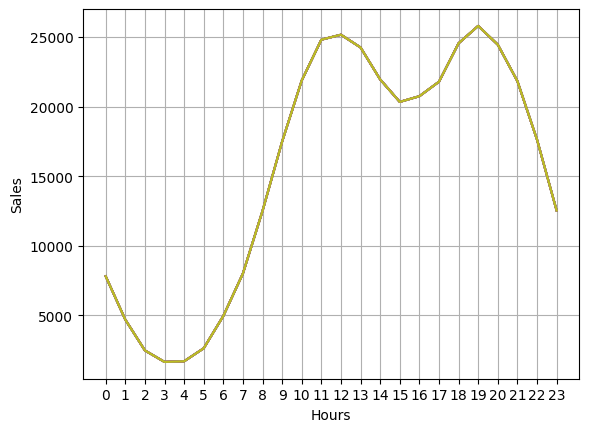

In [25]:
hours = [hour for hour, df in yearly_data.groupby('Hour')]

plt.plot(hours, yearly_data.groupby('Hour').count())
plt.ylabel('Sales')
plt.xlabel('Hours')
plt.xticks(hours)
plt.grid()
plt.show()

###### It shows max purchased time appears to be 11,12 & 19 hrs

### 4. What products are most often sold together?

In [26]:
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,Sales,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,Dallas TX,23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,Boston MA,99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,Los Angeles CA,600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,Los Angeles CA,11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,Los Angeles CA,11.99,9,27


In [27]:
df = yearly_data[yearly_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,Sales,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,Dallas TX,23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,Boston MA,99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,Los Angeles CA,600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,Los Angeles CA,11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,Los Angeles CA,11.99,9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,4,San Francisco CA,11.95,13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,4,Seattle WA,99.99,7,46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,4,Atlanta GA,11.95,10,58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,4,San Francisco CA,1700.00,10,38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,4,Boston MA,11.99,14,5


In [28]:
df['Order ID'].value_counts()

160873    10
304802     8
312462     8
196615     8
295681     8
          ..
158177     2
158178     2
158179     2
158180     2
259357     2
Name: Order ID, Length: 178437, dtype: int64

In [29]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))
df.shape


(371636, 11)

In [30]:
df=df[['Order ID', 'Grouped']].drop_duplicates()
df.shape

(178437, 2)

In [31]:
df.head(20)

,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable"
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones"
6,176562,"USB-C Charging Cable,USB-C Charging Cable"
7,176563,"Bose SoundSport Headphones,Bose SoundSport Hea..."
8,176564,"USB-C Charging Cable,USB-C Charging Cable"
9,176565,"Macbook Pro Laptop,Macbook Pro Laptop"
10,176566,"Wired Headphones,Wired Headphones"
11,176567,"Google Phone,Google Phone"


In [32]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    
# print(count)

for key, value in count.most_common(20):
    if key[0]!=key[1]:
        print(key,value)

('iPhone', 'Lightning Charging Cable') 3021
('Google Phone', 'USB-C Charging Cable') 2971
('iPhone', 'Wired Headphones') 1356


### 5. What product sold the most and why?

In [33]:
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,Sales,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,Dallas TX,23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,Boston MA,99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,Los Angeles CA,600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,Los Angeles CA,11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,Los Angeles CA,11.99,9,27


In [34]:
product_group = yearly_data.groupby('Product')
product_group

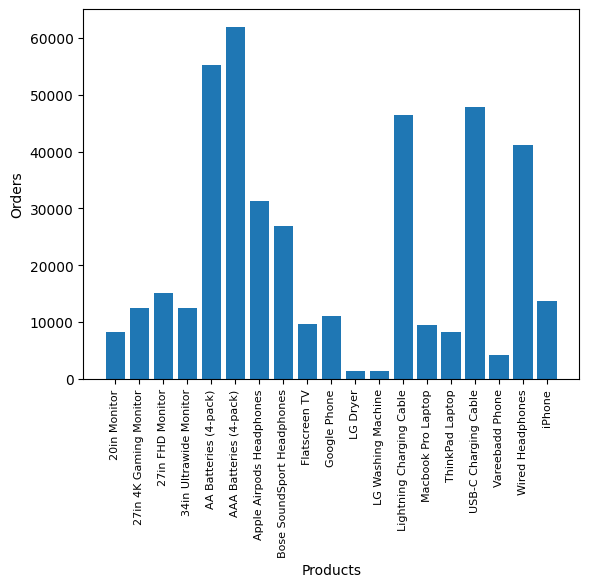

In [35]:
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Orders')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [36]:
product_price = yearly_data.groupby('Product').mean()['Price Each']
product_price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

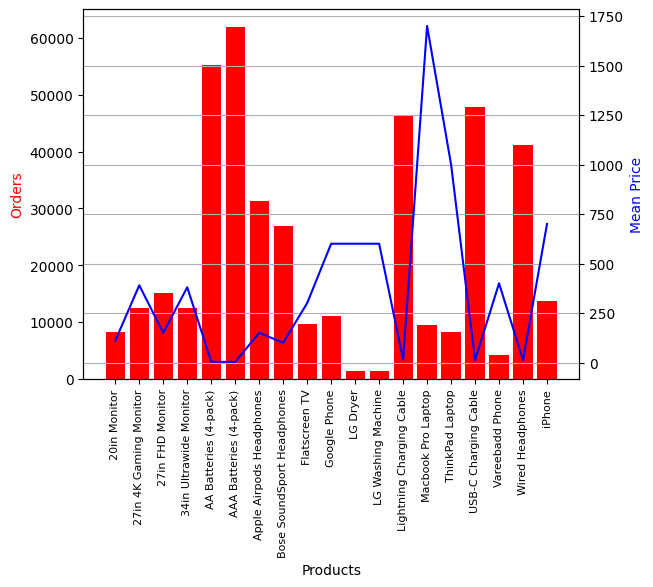

In [37]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'r')
ax2.plot(products, product_price, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Orders', color='r')
ax2.set_ylabel('Mean Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.grid()
plt.show()